In [17]:
from Loss_function import loss_function
from function_evaluation import func_and_deriv
import numpy as np
from qiskit_algorithms.optimizers import ADAM, L_BFGS_B, COBYLA
import time

In [18]:
#Set seed:
RANDOM_STATE = 42
seed = np.random.seed(RANDOM_STATE)

#Define parameters
epochs = 10
shots_simulator = 1024 #number simulator runs
num_qubits = 6 #number of qubits
l = 5 #depth of variational circuit
init_theta = 2*np.pi*np.random.random(num_qubits*l*3)
x = np.linspace(0,0.9,20) #grid points

In [19]:
def training(epochs):
    losses = []
    theta = init_theta
    for i in range(epochs):
        print("epoch number = ", i)
        
        loss = loss_function(x,num_qubits,l,theta,shots_simulator)
        print("Current loss:", loss)
        losses.append(loss)

        objective_function = lambda theta: loss_function(x,num_qubits,l,theta,shots_simulator)
        print()
        print("Starting optimizer now!")
        optimizer = COBYLA(maxiter=250) #250?
        start = time.time()
        theta_opt = optimizer.minimize(objective_function,theta).x
        end = time.time()
        print("Finished optimizing.")
        print("Costs ", end-start, "seconds.")

        if i == 0:
            print(theta_opt)

        theta = theta_opt

    return theta_opt, losses

In [20]:
theta_opt, losses = training(epochs)

epoch number =  0
Current loss: 17.603892341629443

Starting optimizer now!
Finished optimizing.
Costs  790.6865425109863 seconds.
[ 2.36060414  5.97007237  5.59413476  3.74978085  1.9826868   0.97323701
  0.3661252   5.43825129  3.76754836  4.45211577  0.13139371  6.10206878
  5.23751953  1.33078024  1.1374262   1.15643995  2.73262279  4.2778376
  2.89801716  1.82660067  3.81689418  0.86573653  1.82787829  2.29189406
  2.8571982   4.91880082  1.24062195  3.22621764  3.71665338 -0.17128036
  4.81853186  1.07082972  1.40897309  5.95600392  6.06673903  5.08272734
  2.91578601  0.61177559  4.29836579  2.76338339  1.77060822  3.10697164
  0.21079758  5.70141584  1.62233646  4.16156983  2.96285718  3.26390835
  3.43549278  1.15689765  6.0886659   4.86629544  5.89986339  5.61801329
  3.7530966   5.79258734  0.55606432  1.23446025  0.28649082  2.04164838
  2.44017275  1.70222117  5.20254311  2.24135346  1.75852452  3.40742816
  0.88160996  5.03527072  0.47027638  6.20333226  4.84161021  1.250

In [21]:
print(losses)

[17.603892341629443, 10.44525716191078, 4.850865875728987, 1.316885806543842, 2.407381426887369, 2.56112363420059, 1.998512573041056, 5.194182302613692, 6.677345967814543, 2.7908274984304717]


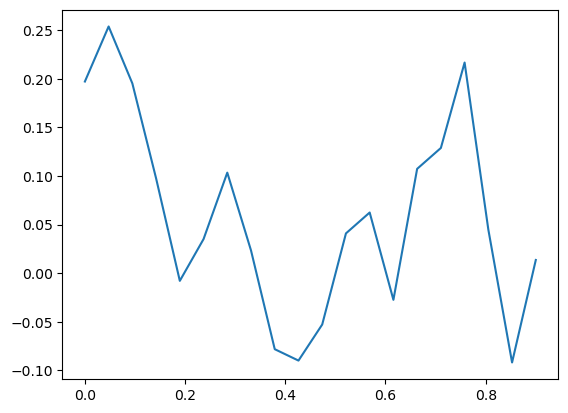

In [22]:
import matplotlib.pyplot as plt

#print(theta_opt)
f, df = func_and_deriv(x,num_qubits,l,theta_opt,shots_simulator)
plt.plot(x, f)
#plt.plot(x, df)

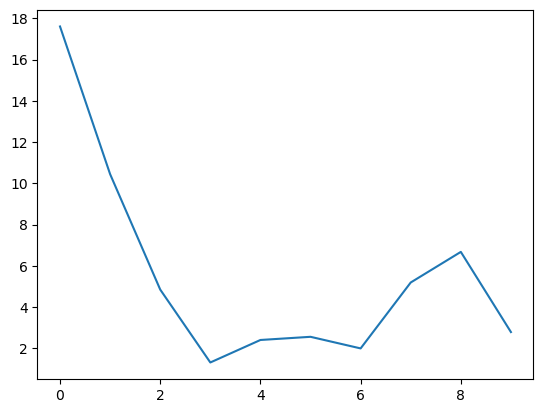

In [24]:
plt.plot(losses)